In [90]:
# Importing standard libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [91]:
# reading the data file

salary_df = pd.read_excel("/Users/superman/Desktop/PythonMIData/MIData/sample_project/banksalaries.xlsx")
salary_df.head()

,Employee,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary,Female_Years1,Log_Salary
0,1,3,1,3,1,26,Male,No,32000.0,0,10.373491
1,2,1,1,14,1,38,Female,No,39100.0,14,10.573878
2,3,1,1,12,0,35,Female,No,33200.0,12,10.410305
3,4,2,1,8,7,40,Female,No,30600.0,8,10.328755
4,5,3,1,3,0,28,Male,No,29000.0,0,10.275051



### ■ Education: education level, a categorical variable with categories 1 (Finished high school), 2 (Finished some college courses), 3 (obtained a bachelor’s degree), 4 (took some graduate courses), 5 (obtained a graduate degree)
 
 ### ■ Grade: a categorical variable indicating the current job level, the possible levels being 1through 6 (6 is highest)

 ### ■ Years1: years of experience with this bank
### ■ Years2: number of years of work experience at another bank prior to working at Fifth National
 ### ■ Age: employee’s current age
 ### ■ Gender: a categorical variable with values “Female” and “Male”
 ### ■ PC Job: a categorical yes/no variable depending on whether the employee’s current job is computer-related
 ### ■ Salary: current annual salary

In [92]:
# Display total count of rows and columns

salary_df.shape

(208, 11)

In [93]:
#check for NA

salary_df.isna().sum()

Employee         0
Education        0
Grade            0
Years1           0
Years2           0
Age              0
Gender           0
PC Job           0
Salary           0
Female_Years1    0
Log_Salary       0
dtype: int64

In [94]:
# dropping female_Years and Log salary which are not standard data columns

salarynew_df = salary_df.drop(["Female_Years1","Log_Salary","Employee"], axis =1)
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender,PC Job,Salary
0,3,1,3,1,26,Male,No,32000.0
1,1,1,14,1,38,Female,No,39100.0
2,1,1,12,0,35,Female,No,33200.0
3,2,1,8,7,40,Female,No,30600.0
4,3,1,3,0,28,Male,No,29000.0


In [95]:
# rename all columns
salarynew_df.columns =[s.strip().replace(' ', '_') for s in salarynew_df.columns]
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender,PC_Job,Salary
0,3,1,3,1,26,Male,No,32000.0
1,1,1,14,1,38,Female,No,39100.0
2,1,1,12,0,35,Female,No,33200.0
3,2,1,8,7,40,Female,No,30600.0
4,3,1,3,0,28,Male,No,29000.0


In [96]:
# Descriptive statistics
print('Number of rows', len(salarynew_df['Salary'])) # show length of the total value column
print('Mean of Total value', salarynew_df['Salary'].mean()) # show mean of column
salarynew_df.describe()

Number of rows 208
Mean of Total value 39921.92307692308


,Education,Grade,Years1,Years2,Age,Salary
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,3.158654,2.759615,9.673077,2.375000,40.394231,39921.923077
std,1.467464,1.566529,6.987832,3.135237,10.318988,11256.153922
min,1.000000,1.000000,2.000000,0.000000,22.000000,26700.000000
25%,2.000000,1.000000,5.000000,0.000000,32.000000,33000.000000
50%,3.000000,3.000000,8.000000,1.000000,38.500000,37000.000000
75%,5.000000,4.000000,13.000000,4.000000,47.250000,44000.000000
max,5.000000,6.000000,39.000000,18.000000,65.000000,97000.000000


In [97]:
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender,PC_Job,Salary
0,3,1,3,1,26,Male,No,32000.0
1,1,1,14,1,38,Female,No,39100.0
2,1,1,12,0,35,Female,No,33200.0
3,2,1,8,7,40,Female,No,30600.0
4,3,1,3,0,28,Male,No,29000.0


In [98]:
# use drop_first = True to drop the first dummy variable

salarynew_df = pd.get_dummies(salarynew_df, prefix_sep = '_', drop_first = False)
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Salary,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes
0,3,1,3,1,26,32000.0,0,1,1,0
1,1,1,14,1,38,39100.0,1,0,1,0
2,1,1,12,0,35,33200.0,1,0,1,0
3,2,1,8,7,40,30600.0,1,0,1,0
4,3,1,3,0,28,29000.0,0,1,1,0


In [99]:

mid = salarynew_df['Salary']
new = salarynew_df.drop(labels=['Salary'], axis=1, inplace = True)
salarynew_df = salarynew_df.join(mid)

salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,3,1,3,1,26,0,1,1,0,32000.0
1,1,1,14,1,38,1,0,1,0,39100.0
2,1,1,12,0,35,1,0,1,0,33200.0
3,2,1,8,7,40,1,0,1,0,30600.0
4,3,1,3,0,28,0,1,1,0,29000.0


In [101]:
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,3,1,3,1,26,0,1,1,0,32000.0
1,1,1,14,1,38,1,0,1,0,39100.0
2,1,1,12,0,35,1,0,1,0,33200.0
3,2,1,8,7,40,1,0,1,0,30600.0
4,3,1,3,0,28,0,1,1,0,29000.0


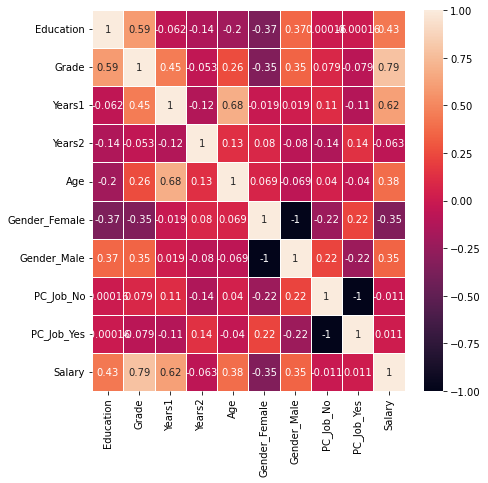

In [102]:
# finding correlation between variables that impact dependent variable salary

fig, ax = plt.subplots(figsize=(7,7))
corl = salarynew_df.corr()
sns.heatmap(corl, annot=True,linewidths=.5, ax=ax);

# correlation between salary to Grade, Years1 is stronger and at 40% level for education and age.
# While we see negative correlation for feamle gender of -0.35 and +0.35 for male gender, this can provide a notion about some discrimination
# however, other factors such as grade, education, age gender and years1 will play a role
# years2 experince consideration is almost zero

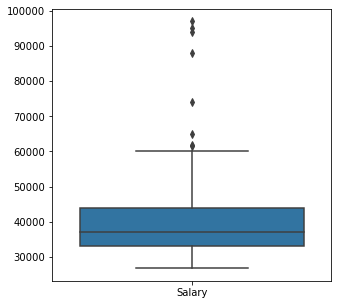

In [103]:
# boxplot provides number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

plt.figure(figsize=(5,5))
sns.boxplot(data=salarynew_df[['Salary']]);

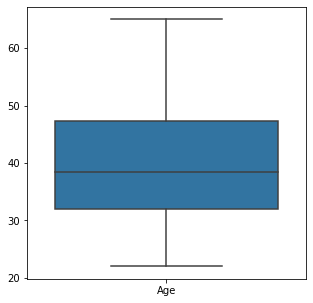

In [120]:
# boxplot provides number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).

plt.figure(figsize=(5,5))
sns.boxplot(data=salarynew_df[['Age']]);

<AxesSubplot:>

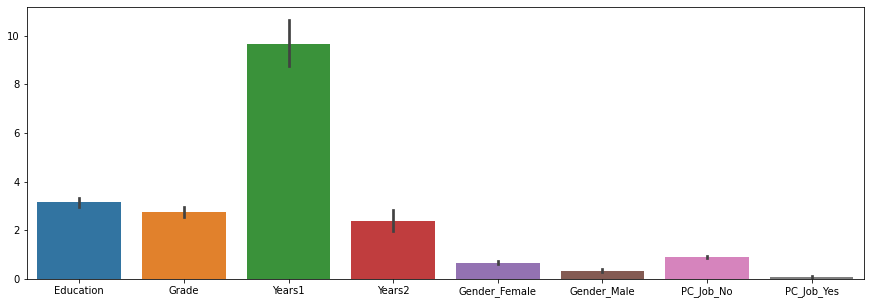

In [121]:
# boxplot provides number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).


data1 = salarynew_df.drop(["Salary",'Age'], axis=1)
plt.figure(figsize=(15,5))
sns.barplot(data = data1)

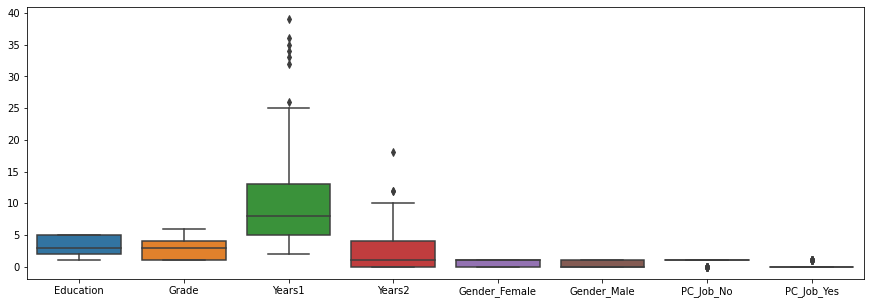

In [122]:
# boxplot provides number summary (“minimum”, first quartile (Q1), median, third quartile (Q3), and “maximum”).
plt.figure(figsize=(15,5))
sns.boxplot(data = data1);

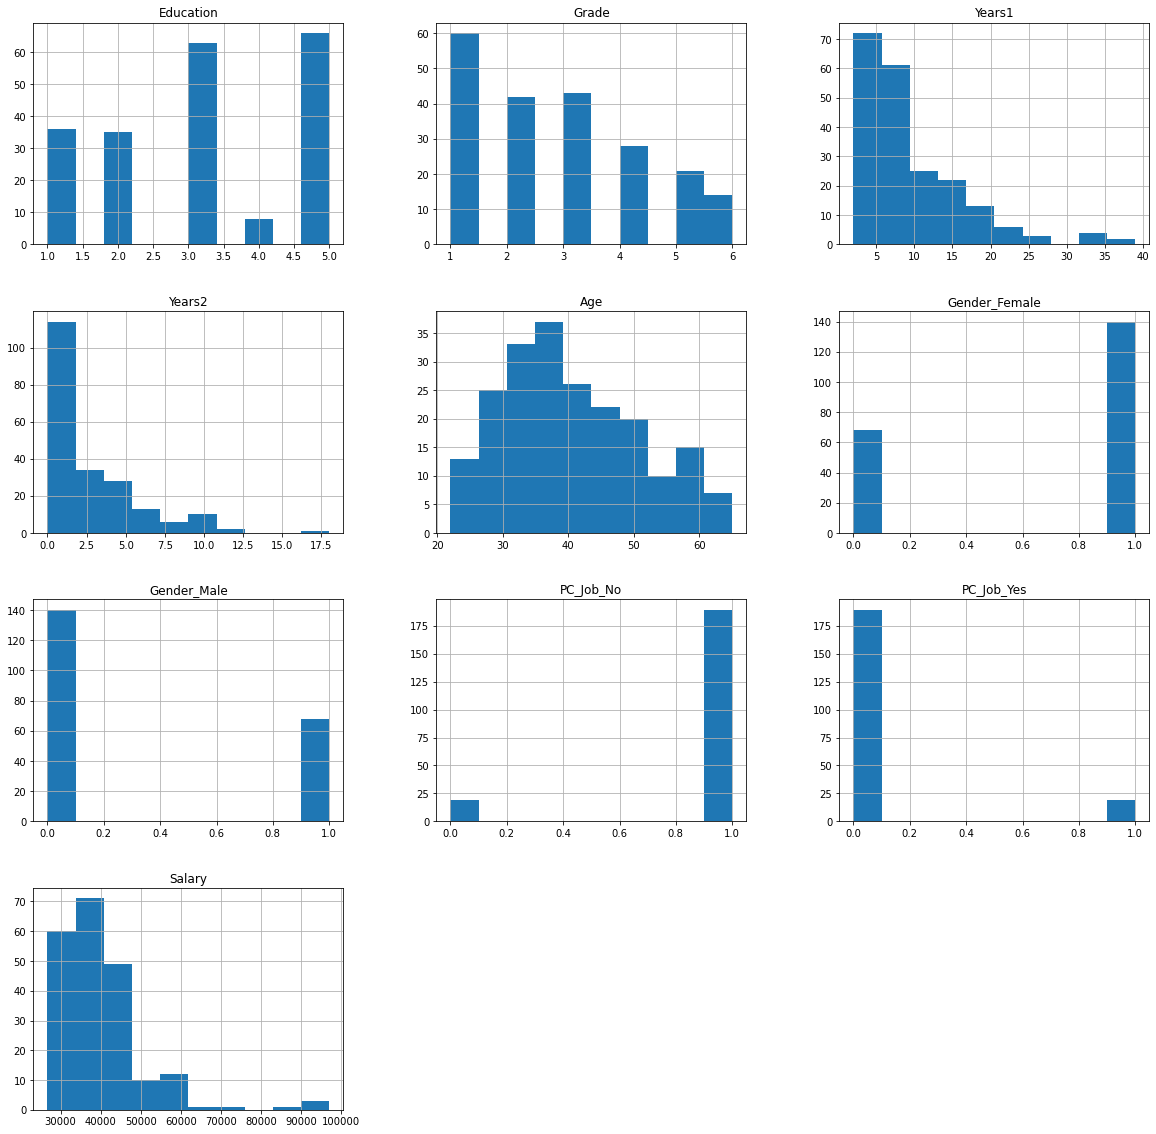

In [123]:
#histogram - helps in understanding the data distribution

salarynew_df.hist(figsize = (20,20));

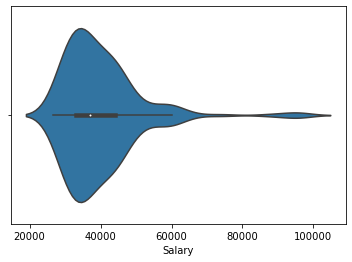

In [124]:
ax=sns.violinplot(x=salarynew_df["Salary"])

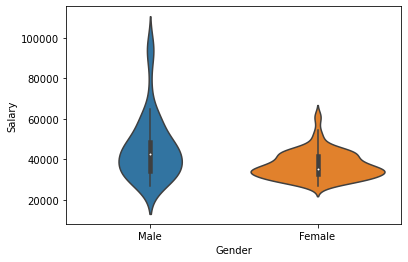

In [125]:
ax=sns.violinplot(y='Salary',x='Gender',data=salary_df,scale='area')

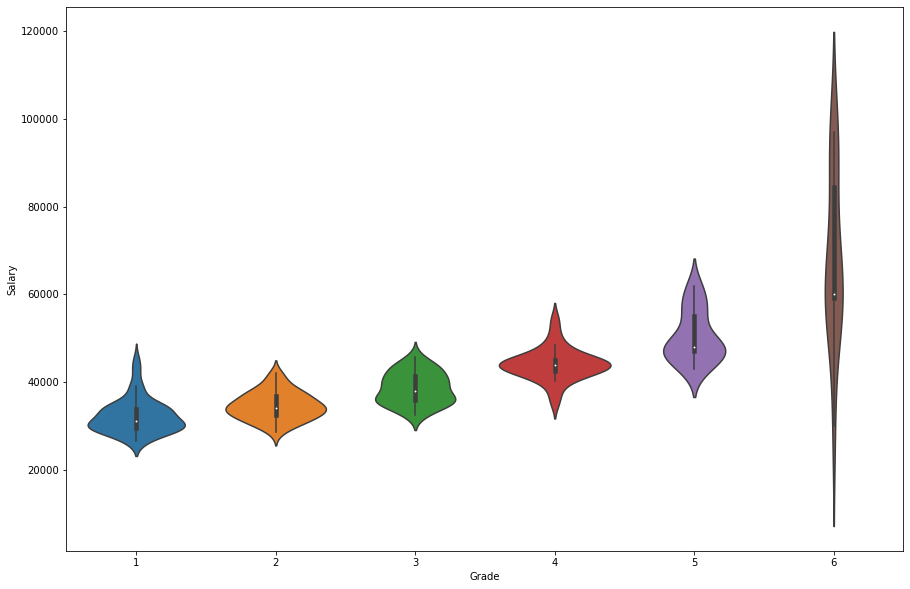

In [126]:
fig, ax = plt.subplots(figsize=(15,10))

ax=sns.violinplot(y='Salary',x='Grade', data=salarynew_df,scale='area')

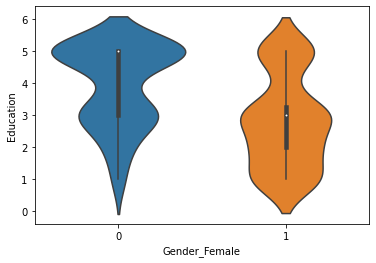

In [127]:
ax=sns.violinplot(y='Education',x='Gender_Female', data=salarynew_df,scale='area')

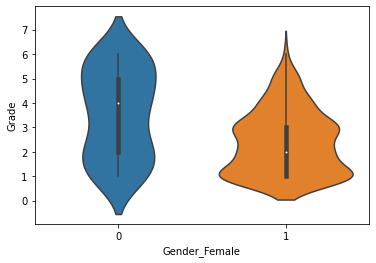

In [128]:
ax=sns.violinplot(y='Grade',x='Gender_Female', data=salarynew_df,scale='area')

In [129]:
salarynew_df.columns

Index(['Education', 'Grade', 'Years1', 'Years2', 'Age', 'Gender_Female',
       'Gender_Male', 'PC_Job_No', 'PC_Job_Yes', 'Salary'],
      dtype='object')

/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


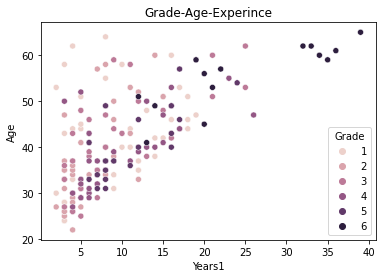

In [130]:
sns.scatterplot('Years1', 'Age', hue='Grade', data=salary_df).set(title = 'Grade-Age-Experince', xlabel = 'Years1', ylabel = 'Age');


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


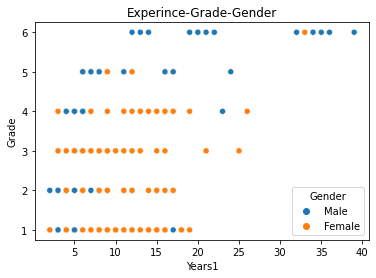

In [131]:
sns.scatterplot('Years1', 'Grade', hue='Gender', data=salary_df).set(title = 'Experince-Grade-Gender', xlabel = 'Years1', ylabel = 'Grade');


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


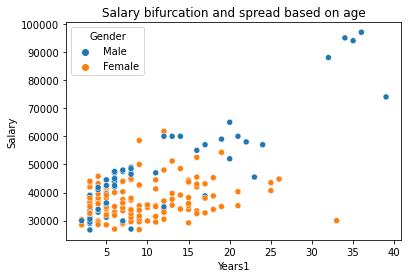

In [116]:
sns.scatterplot('Years1', 'Salary', hue='Gender', data=salary_df).set(title = 'Salary bifurcation and spread based on age', xlabel = 'Years1', ylabel = 'Salary');


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


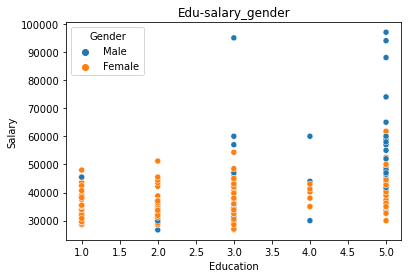

In [117]:
sns.scatterplot('Education', 'Salary', hue='Gender', data=salary_df).set(title = 'Edu-salary_gender', xlabel = 'Education', ylabel = 'Salary');


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


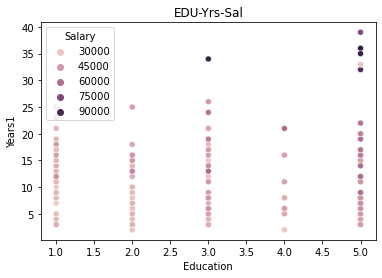

In [118]:
sns.scatterplot('Education', 'Years1', hue='Salary', data=salary_df).set(title = 'EDU-Yrs-Sal', xlabel = 'Education', ylabel = 'Years1');


/Users/superman/Desktop/PythonMIData/MIData/sample_project/env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


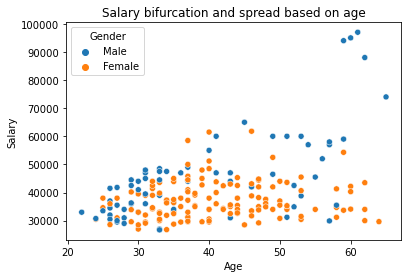

In [119]:
sns.scatterplot('Age', 'Salary', hue='Gender', data=salary_df).set(title = 'Salary bifurcation and spread based on age', xlabel = 'Age', ylabel = 'Salary');


In [1]:
sns.scatterplot('Gender_Female', 'Grade', hue='Salary', data=salary_df).set(title = 'Salary bifurcation and spread based on age', xlabel = 'Age', ylabel = 'Salary');


NameError: name 'sns' is not defined

In [414]:
# cross tab

pd.crosstab([salarynew_df.Gender_Female, salarynew_df.Salary, salarynew_df.Age, salarynew_df.Years1, salarynew_df.Education],[salarynew_df.Grade],margins=True)



Grade                                       1   2   3   4   5   6  All
Gender_Female Salary Age Years1 Education                             
0             26700  33  3      2           1   0   0   0   0   0    1
              27000  33  8      3           1   0   0   0   0   0    1
              29000  28  3      3           1   0   0   0   0   0    1
              29500  27  3      3           1   0   0   0   0   0    1
              29900  57  7      2           0   1   0   0   0   0    1
...                                        ..  ..  ..  ..  ..  ..  ...
1             54300  59  19     3           0   0   0   1   0   0    1
              58500  37  9      5           0   0   0   0   1   0    1
              61500  40  12     5           0   0   0   0   1   0    1
              61800  46  12     5           0   0   0   0   1   0    1
All                                        60  42  43  28  21  14  208

[209 rows x 7 columns]

In [407]:
pd.crosstab([salarynew_df.Gender_Female,salarynew_df.Education>=5, salarynew_df.Years2 >= 10],[salarynew_df.Salary],margins=True)


Salary                          26700  26800  27000  28500  28600  28760  \
Gender_Female Education Years2                                             
0             False     False       1      0      1      0      0      0   
                        True        0      0      0      0      0      0   
              True      False       0      0      0      0      0      0   
                        True        0      0      0      0      0      0   
1             False     False       0      1      1      2      1      1   
                        True        0      0      0      0      0      0   
              True      False       0      0      0      0      0      0   
                        True        0      0      0      0      0      0   
All                                 1      1      2      2      1      1   

Salary                          29000  29100  29200  29500  ...  60000  61500  \
Gender_Female Education Years2                              ...                 
0             False     False       1      0      0      1  ...      2      0   
                        True        0      0      0      0  ...      0      0   
              True      False       0      0      0      0  ...      2      0   
                        True        0      0      0      0  ...      0      0   
1             False     False       0      1      1      3  ...      0      0   
                        True        0      0      0      0  ...      0      0   
              True      False       0      0      0      0  ...      0      1   
                        True        0      0      0      0  ...      0      0   
All                                 1      1      1      4  ...      4      1   

Salary                          61800  65000  74000  88000  94000  95000  \
Gender_Female Education Years2                                             
0             False     False       0      0      0      0      0      1   
                        True        0      0      0      0      0      0   
              True      False       0      1      1      1      1      0   
                        True        0      0      0      0      0      0   
1             False     False       0      0      0      0      0      0   
                        True        0      0      0      0      0      0   
              True      False       1      0      0      0      0      0   
                        True        0      0      0      0      0      0   
All                                 1      1      1      1      1      1   

Salary                          97000  All  
Gender_Female Education Years2              
0             False     False       0   30  
                        True        0    2  
              True      False       1   35  
                        True        0    1  
1             False     False       0  106  
                        True        0    4  
              True      False       0   29  
                        True        0    1  
All                                 1  208  

[9 rows x 126 columns]

In [408]:
# cross tab between edication salary and gender female

pd.crosstab([salarynew_df.Gender_Female, salarynew_df.Years2, salarynew_df.Grade >= 4],[salarynew_df.Salary],margins=True,)

Salary                      26700  26800  27000  28500  28600  28760  29000  \
Gender_Female Years2 Grade                                                    
0             0      False      0      0      0      0      0      0      1   
                     True       0      0      0      0      0      0      0   
              1      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              2      False      0      0      1      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              3      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              4      False      1      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              5      False      0      0      0      0      0      0      0   
              7      True       0      0      0      0      0      0      0   
              8      False      0      0      0      0      0      0      0   
              10     False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              18     False      0      0      0      0      0      0      0   
1             0      False      0      0      1      1      1      0      0   
                     True       0      0      0      0      0      0      0   
              1      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              2      False      0      1      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              3      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              4      False      0      0      0      1      0      1      0   
                     True       0      0      0      0      0      0      0   
              5      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              6      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              7      False      0      0      0      0      0      0      0   
              8      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              9      False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
              10     False      0      0      0      0      0      0      0   
              12     False      0      0      0      0      0      0      0   
                     True       0      0      0      0      0      0      0   
All                             1      1      2      2      1      1      1   

Salary                      29100  29200  29500  ...  60000  61500  61800  \
Gender_Female Years2 Grade                       ...                        
0             0      False      0      0      0  ...      0      0      0   
                     True       0      0      0  ...      4      0      0   
              1      False      0      0      1  ...      0      0      0   
                     True       0      0      0  ...      0      0      0   
              2      False      0      0      0  ...      0      0      0   
                     True       0      0      0  ...      0      0      0   
              3      False      0      0      0  ...      0      0      0   
                     True       0      0      0  ...      0      0 

In [409]:
# cross tab between edication salary and gender female

pd.crosstab([salarynew_df.Gender_Female,salarynew_df.Education],[salarynew_df.Salary],margins=True,)

Salary                   26700  26800  27000  28500  28600  28760  29000  \
Gender_Female Education                                                    
0             1              0      0      0      0      0      0      0   
              2              1      0      0      0      0      0      0   
              3              0      0      1      0      0      0      1   
              4              0      0      0      0      0      0      0   
              5              0      0      0      0      0      0      0   
1             1              0      0      0      1      0      1      0   
              2              0      0      0      1      0      0      0   
              3              0      1      1      0      1      0      0   
              4              0      0      0      0      0      0      0   
              5              0      0      0      0      0      0      0   
All                          1      1      2      2      1      1      1   

Salary                   29100  29200  29500  ...  60000  61500  61800  65000  \
Gender_Female Education                       ...                               
0             1              0      0      0  ...      0      0      0      0   
              2              0      0      0  ...      0      0      0      0   
              3              0      0      1  ...      1      0      0      0   
              4              0      0      0  ...      1      0      0      0   
              5              0      0      0  ...      2      0      0      1   
1             1              0      0      1  ...      0      0      0      0   
              2              1      0      0  ...      0      0      0      0   
              3              0      1      2  ...      0      0      0      0   
              4              0      0      0  ...      0      0      0      0   
              5              0      0      0  ...      0      1      1      0   
All                          1      1      4  ...      4      1      1      1   

Salary                   74000  88000  94000  95000  97000  All  
Gender_Female Education                                          
0             1              0      0      0      0      0    3  
              2              0      0      0      0      0    6  
              3              0      0      0      1      0   20  
              4              0      0      0      0      0    3  
              5              1      1      1      0      1   36  
1             1              0      0      0      0      0   33  
              2              0      0      0      0      0   29  
              3              0      0      0      0      0   43  
              4              0      0      0      0      0    5  
              5              0      0      0      0      0   30  
All                          1      1      1      1      1  208  

[11 rows x 126 columns]

In [410]:
# cross tab between edication salary and gender female

pd.crosstab([salarynew_df.Gender_Female, salarynew_df.Education,salarynew_df.Years2],[salarynew_df.Age],margins=True)

Age                             22  24  25  26  27  28  29  30  31  32  ...  \
Gender_Female Education Years2                                          ...   
0             1         0        0   0   0   0   0   0   0   0   0   0  ...   
                        3        0   0   0   0   0   0   0   0   0   0  ...   
              2         3        0   0   0   0   0   1   0   1   0   0  ...   
                        4        0   0   0   0   0   0   1   0   0   0  ...   
                        18       0   0   0   0   0   0   0   0   0   0  ...   
...                             ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...   
1             5         4        0   0   0   0   0   0   1   0   0   1  ...   
                        5        0   0   0   0   0   0   0   0   0   0  ...   
                        6        0   0   0   0   0   0   0   0   0   0  ...   
                        12       0   0   0   0   0   0   0   0   0   0  ...   
All                              1   2   3   7   7   3   8   7   9   6  ...   

Age                             56  57  58  59  60  61  62  64  65  All  
Gender_Female Education Years2                                           
0             1         0        0   0   0   0   0   0   0   0   0    1  
                        3        0   0   1   0   0   0   0   0   0    2  
              2         3        0   0   0   0   0   0   0   0   0    2  
                        4        0   1   0   0   0   0   0   0   0    3  
                        18       0   0   0   0   0   0   0   0   0    1  
...                             ..  ..  ..  ..  ..  ..  ..  ..  ..  ...  
1             5         4        0   0   0   0   0   0   0   0   0    2  
                        5        0   0   0   0   0   0   0   0   0    3  
                        6        0   0   0   0   0   0   0   0   0    2  
                        12       0   0   0   0   0   0   0   0   0    1  
All                              1   3   4   4   4   1   4   1   1  208  

[66 rows x 43 columns]

<AxesSubplot:xlabel='Years1', ylabel='Grade'>

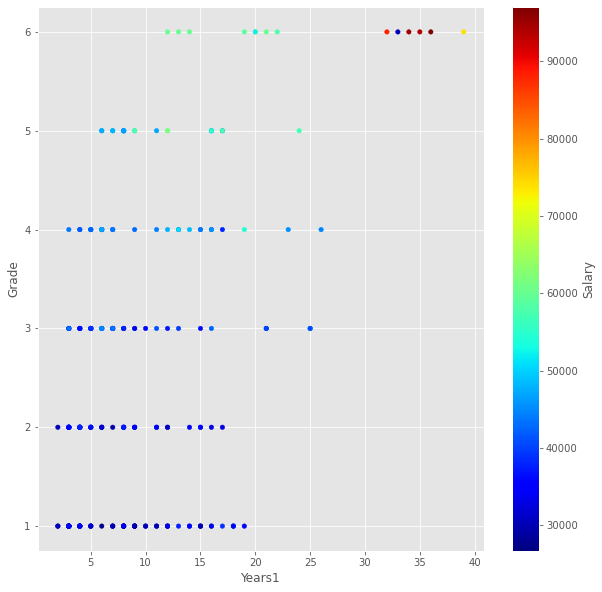

In [411]:
# Years1 and 2 with salary

salarynew_df["Salary"] = salarynew_df["Salary"]

# plot scatter plot with price column as numeric
salarynew_df.plot(x="Years1", y="Grade", kind ="scatter", c = "Salary", figsize =(10,10), colormap='jet',sharex=False)

<AxesSubplot:xlabel='Salary', ylabel='Education'>

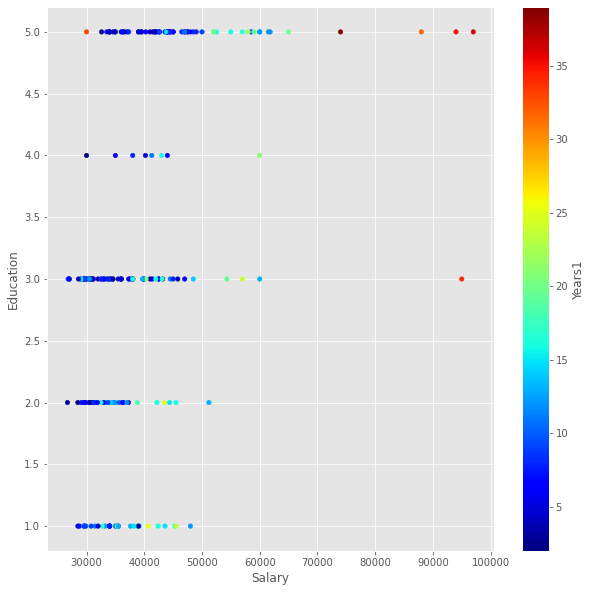

In [413]:
# Years1 and 2 with salary

salarynew_df["Salary"] = salarynew_df["Salary"]

# plot scatter plot with price column as numeric
salarynew_df.plot(x="Salary", y="Education", kind ="scatter", c = "Years1", figsize =(10,10), colormap='jet',sharex=False)

In [318]:
# Normalizing the data


from sklearn.preprocessing import MinMaxScaler, StandardScaler
df = salarynew_df.copy()

# with Scikit- Learn:

scaler = StandardScaler()
norm_df = pd.DataFrame(scaler.fit_transform(salarynew_df), index = salarynew_df.index, columns= salarynew_df.columns)


#scikit-learn:

scaler = MinMaxScaler()
norm_df = pd.DataFrame(scaler.fit_transform(salarynew_df), index=salarynew_df.index, columns=salarynew_df.columns)

norm_df

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,0.50,0.0,0.027027,0.055556,0.093023,0.0,1.0,1.0,0.0,0.075391
1,0.00,0.0,0.324324,0.055556,0.372093,1.0,0.0,1.0,0.0,0.176387
2,0.00,0.0,0.270270,0.000000,0.302326,1.0,0.0,1.0,0.0,0.092461
3,0.25,0.0,0.162162,0.388889,0.418605,1.0,0.0,1.0,0.0,0.055477
4,0.50,0.0,0.027027,0.000000,0.139535,0.0,1.0,1.0,0.0,0.032717
...,...,...,...,...,...,...,...,...,...,...
203,0.50,1.0,0.864865,0.000000,0.883721,0.0,1.0,1.0,0.0,0.971550
204,1.00,1.0,0.918919,0.000000,0.906977,0.0,1.0,1.0,0.0,1.000000
205,1.00,1.0,0.810811,0.000000,0.930233,0.0,1.0,1.0,0.0,0.871977
206,1.00,1.0,0.891892,0.000000,0.860465,0.0,1.0,1.0,0.0,0.957326


<AxesSubplot:>

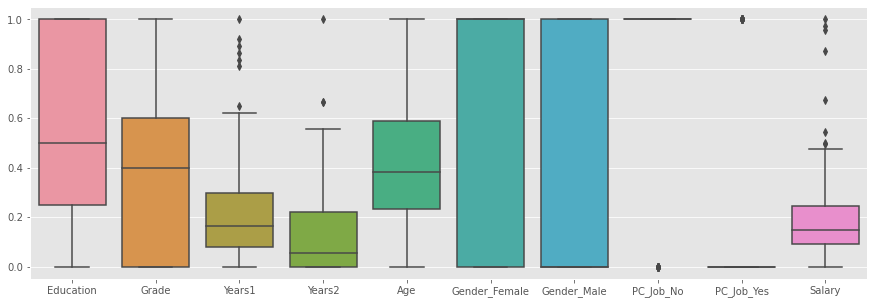

In [334]:
# barplot defines the spread of the variables that is max and min spread


data1 = salarynew_df.drop("Salary", axis=1)
plt.figure(figsize=(15,5))
sns.boxplot(data = norm_df)

In [427]:
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,3,1,3,1,26,0,1,1,0,32000
1,1,1,14,1,38,1,0,1,0,39100
2,1,1,12,0,35,1,0,1,0,33200
3,2,1,8,7,40,1,0,1,0,30600
4,3,1,3,0,28,0,1,1,0,29000


In [482]:
x = salarynew_df.iloc[:, [5,9]].values
x

array([[    0, 32000],
       [    1, 39100],
       [    1, 33200],
       [    1, 30600],
       [    0, 29000],
       [    1, 30500],
       [    1, 30000],
       [    0, 27000],
       [    1, 34000],
       [    1, 29500],
       [    1, 26800],
       [    1, 31300],
       [    1, 31200],
       [    1, 34700],
       [    1, 30000],
       [    1, 31000],
       [    1, 27000],
       [    1, 29600],
       [    1, 32600],
       [    1, 29600],
       [    1, 29500],
       [    0, 31000],
       [    1, 28500],
       [    0, 26700],
       [    0, 30750],
       [    0, 29500],
       [    1, 42200],
       [    1, 37600],
       [    1, 34000],
       [    1, 33000],
       [    1, 28760],
       [    1, 35400],
       [    0, 31000],
       [    1, 38800],
       [    1, 34300],
       [    1, 35000],
       [    1, 34600],
       [    1, 28500],
       [    1, 29500],
       [    0, 30500],
       [    1, 34200],
       [    1, 43600],
       [    1, 33500],
       [   

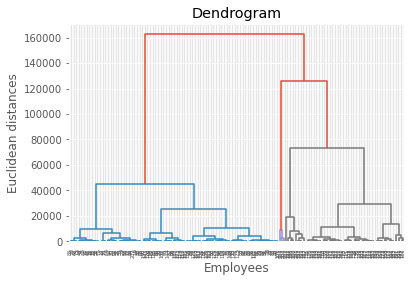

In [429]:
#Clustering
import scipy.cluster.hierarchy as sch

dendro = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Employees')
plt.ylabel('Euclidean distances')
plt.show()

In [424]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)
print(y_hc)

[4 1 1 4 4 4 4 4 1 4 4 4 4 1 4 4 4 4 1 4 4 4 4 4 4 4 0 1 1 1 4 1 4 1 1 1 1
 4 4 4 1 0 1 1 0 1 4 4 1 4 1 1 4 4 4 4 1 1 4 1 1 1 4 1 1 4 4 0 1 1 4 4 0 1
 1 4 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 4 4 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 3 0 0 3 0 3 3 3 3 3 3 3 0 3 3 3 2 2 2 2 4]


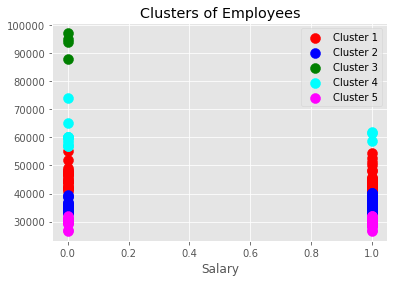

In [430]:
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters of Employees')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.legend()
plt.show()

# Prediction process 

In [501]:
# Normalized data frame
norm_df.head()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,0.50,0.0,0.027027,0.055556,0.093023,0.0,1.0,1.0,0.0,0.075391
1,0.00,0.0,0.324324,0.055556,0.372093,1.0,0.0,1.0,0.0,0.176387
2,0.00,0.0,0.270270,0.000000,0.302326,1.0,0.0,1.0,0.0,0.092461
3,0.25,0.0,0.162162,0.388889,0.418605,1.0,0.0,1.0,0.0,0.055477
4,0.50,0.0,0.027027,0.000000,0.139535,0.0,1.0,1.0,0.0,0.032717


# Linear Regression

In [540]:
# import algorithm --- LinearRegression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix


#setup random seed

np.random.seed(42)

#create the data train and validation/test

x = salarynew_df.drop("Salary", axis =1)

y = salarynew_df["Salary"] # salary

# split into train and test sets

x_train, valid_x, y_train, valid_y = train_test_split(x, y, test_size=0.2)


# Instantiate and fit the mode ( on the training set)

model = LinearRegression()
model.fit(x_train, y_train)

# Check the score of the model (on the test set)
model.score(valid_x, valid_y)

0.6997392002141255

In [541]:
train_pred = model.predict(x_train)

train_results = pd.DataFrame ({'Salary' : y_train, 'predicted': train_pred, 'residual': y_train - train_pred})

train_results.head()

,Salary,predicted,residual
86,31900,31903.110468,-3.110468
203,95000,70043.491038,24956.508962
67,41400,37052.035891,4347.964109
82,39000,34283.135132,4716.864868
205,88000,70285.589946,17714.410054


In [542]:
# Predictions for a sample fo validation data

valid_pred = model.predict(valid_x)

valid_results = pd.DataFrame({'Salary': valid_y, 'predicted': valid_pred, 'residual': valid_y-valid_pred})
valid_results.head()

,Salary,predicted,residual
161,44000,39320.084652,4679.915348
15,31000,26890.777480,4109.222520
73,34000,35693.932467,-1693.932467
96,40200,32281.068316,7918.931684
166,48000,46953.310170,1046.689830


In [543]:
# import the utility function regressionSummary

from dmba import regressionSummary

#training set

regressionSummary(train_results.Salary, train_results.predicted)

#Validation set

regressionSummary(valid_results.Salary, valid_results.predicted)



Regression statistics

                      Mean Error (ME) : 0.0000
       Root Mean Squared Error (RMSE) : 5977.1955
            Mean Absolute Error (MAE) : 3779.7382
          Mean Percentage Error (MPE) : -1.2936
Mean Absolute Percentage Error (MAPE) : 9.2679

Regression statistics

                      Mean Error (ME) : 552.6921
       Root Mean Squared Error (RMSE) : 4561.6809
            Mean Absolute Error (MAE) : 3407.1190
          Mean Percentage Error (MPE) : 0.0368
Mean Absolute Percentage Error (MAPE) : 8.5295


# Randomforest regressor

In [546]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = salarynew_df.drop("Salary", axis =1)

y = salarynew_df["Salary"] # salary

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model1 = RandomForestRegressor(n_estimators = 100) # n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions

model1.fit(x_train,y_train)
model1.score(x_test, y_test)

0.8254998006438407

In [549]:
train1_pred = model1.predict(x_train)

train1_results = pd.DataFrame ({'Salary' : y_train, 'predicted': train_pred, 'residual': y_train - train_pred})

train1_results.head()

,Salary,predicted,residual
86,31900,32962.5,-1062.5
203,95000,87225.0,7775.0
67,41400,38643.0,2757.0
82,39000,38540.5,459.5
205,88000,75710.0,12290.0


In [550]:
# Predictions for a sample fo validation data

valid1_pred = model1.predict(x_test)

valid1_results = pd.DataFrame({'Salary': y_test, 'predicted': valid_pred, 'residual': y_test-valid_pred})
valid1_results.head()

,Salary,predicted,residual
161,44000,40496.0,3504.0
15,31000,30344.5,655.5
73,34000,34663.0,-663.0
96,40200,32747.0,7453.0
166,48000,47569.0,431.0


In [551]:
# import the utility function regressionSummary

from dmba import regressionSummary

#training set

regressionSummary(train1_results.Salary, train1_results.predicted)

#Validation set

regressionSummary(valid1_results.Salary, valid1_results.predicted)



Regression statistics

                      Mean Error (ME) : -29.0699
       Root Mean Squared Error (RMSE) : 2600.8669
            Mean Absolute Error (MAE) : 1373.8024
          Mean Percentage Error (MPE) : -0.5943
Mean Absolute Percentage Error (MAPE) : 3.3726

Regression statistics

                      Mean Error (ME) : 663.8310
       Root Mean Squared Error (RMSE) : 3477.5513
            Mean Absolute Error (MAE) : 2710.3786
          Mean Percentage Error (MPE) : 0.5944
Mean Absolute Percentage Error (MAPE) : 6.8364


# KNN regresison

In [573]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

x = salarynew_df.drop("Salary", axis =1)

y = salarynew_df["Salary"] # salary

# split into train and test sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

knn = KNeighborsRegressor(n_neighbors=5)

# Fitting the model to the train data

knn.fit(x_train,y_train)

knn.score(x_train,y_train)

0.7464431429064085

In [574]:
knn.score(x_test,y_test)

0.5102445092455126

# INput New data

In [567]:
salarynew_df.head()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
0,3,1,3,1,26,0,1,1,0,32000
1,1,1,14,1,38,1,0,1,0,39100
2,1,1,12,0,35,1,0,1,0,33200
3,2,1,8,7,40,1,0,1,0,30600
4,3,1,3,0,28,0,1,1,0,29000


In [566]:
salarynew_df.tail()

,Education,Grade,Years1,Years2,Age,Gender_Female,Gender_Male,PC_Job_No,PC_Job_Yes,Salary
203,3,6,34,0,60,0,1,1,0,95000
204,5,6,36,0,61,0,1,1,0,97000
205,5,6,32,0,62,0,1,1,0,88000
206,5,6,35,0,59,0,1,1,0,94000
207,5,6,33,0,62,1,0,1,0,30000


In [570]:
new_data = pd.DataFrame({'Education':[1,1,3,3,4,4], 'Grade':[1,1,2,2,6,6],
                         'Years1':[15,15,15,15,15,15],'Years2':[1,1,1,1,1,1],
                         'Age':[41,41,42,42,43,43], 'Gender_Female': [1,0,1,0,1,0],
                         'Gender_Male': [0,1,0,1,0,1], 'PC_Job_No': [1, 1, 1,1,1,1],
                         'PC_Job_Yes': [0,0,0,0,0,0],})

print(new_data)

Prediction = model.predict(new_data)

print('Prediction:', Prediction)

   Education  Grade  Years1  Years2  Age  Gender_Female  Gender_Male  \
0          1      1      15       1   41              1            0   
1          1      1      15       1   41              0            1   
2          3      2      15       1   42              1            0   
3          3      2      15       1   42              0            1   
4          4      6      15       1   43              1            0   
5          4      6      15       1   43              0            1   

   PC_Job_No  PC_Job_Yes  
0          1           0  
1          1           0  
2          1           0  
3          1           0  
4          1           0  
5          1           0  
Prediction: [34240.98277545 38858.47842339 38980.03263225 43597.52828018
 52437.21455895 57054.71020689]


In [571]:
new_data = pd.DataFrame({'Education':[1,1,3,3,4,4], 'Grade':[1,1,2,2,6,6],
                         'Years1':[15,15,15,15,15,15],'Years2':[1,1,1,1,1,1],
                         'Age':[41,41,42,42,43,43], 'Gender_Female': [1,0,1,0,1,0],
                         'Gender_Male': [0,1,0,1,0,1], 'PC_Job_No': [1, 1, 1,1,1,1],
                         'PC_Job_Yes': [0,0,0,0,0,0],})

print(new_data)

Prediction = model1.predict(new_data)

print('Prediction:', Prediction)

   Education  Grade  Years1  Years2  Age  Gender_Female  Gender_Male  \
0          1      1      15       1   41              1            0   
1          1      1      15       1   41              0            1   
2          3      2      15       1   42              1            0   
3          3      2      15       1   42              0            1   
4          4      6      15       1   43              1            0   
5          4      6      15       1   43              0            1   

   PC_Job_No  PC_Job_Yes  
0          1           0  
1          1           0  
2          1           0  
3          1           0  
4          1           0  
5          1           0  
Prediction: [36587.  36527.  31849.  31958.4 51110.  56999. ]


In [572]:
new_data = pd.DataFrame({'Education':[1,1,3,3,4,4], 'Grade':[1,1,2,2,6,6],
                         'Years1':[15,15,15,15,15,15],'Years2':[1,1,1,1,1,1],
                         'Age':[41,41,42,42,43,43], 'Gender_Female': [1,0,1,0,1,0],
                         'Gender_Male': [0,1,0,1,0,1], 'PC_Job_No': [1, 1, 1,1,1,1],
                         'PC_Job_Yes': [0,0,0,0,0,0],})

print(new_data)

Prediction = knn.predict(new_data)

print('Prediction:', Prediction)

   Education  Grade  Years1  Years2  Age  Gender_Female  Gender_Male  \
0          1      1      15       1   41              1            0   
1          1      1      15       1   41              0            1   
2          3      2      15       1   42              1            0   
3          3      2      15       1   42              0            1   
4          4      6      15       1   43              1            0   
5          4      6      15       1   43              0            1   

   PC_Job_No  PC_Job_Yes  
0          1           0  
1          1           0  
2          1           0  
3          1           0  
4          1           0  
5          1           0  
Prediction: [38220. 38220. 38620. 38620. 46660. 46660.]


# Final conclusion

# RandomForestRegression has shown higher accuracy score of 0.82 compared to linear and KNN

# Based on the forestregression and Linear which had higher values than KNN, we predicted salary of a new set data and we do see discrimination in the salaries when comared to female and male employees irrespective of their same credentials.